# Assignment 3: Task 1
Circle detection with Hough transform

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature, transform
from matplotlib.patches import Circle

## Step 1: Load the image and convert to grayscale

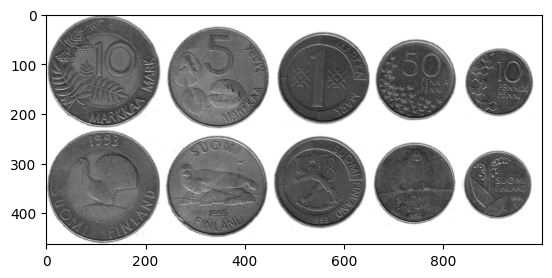

In [7]:
image_path = 'coins.jpg'  # Replace with the correct path
gray_image = color.rgb2gray(io.imread(image_path))
plt.imshow(gray_image, cmap="grey")
plt.show()

## Step 2: Calculate radii of coins (mm to pixels conversion)

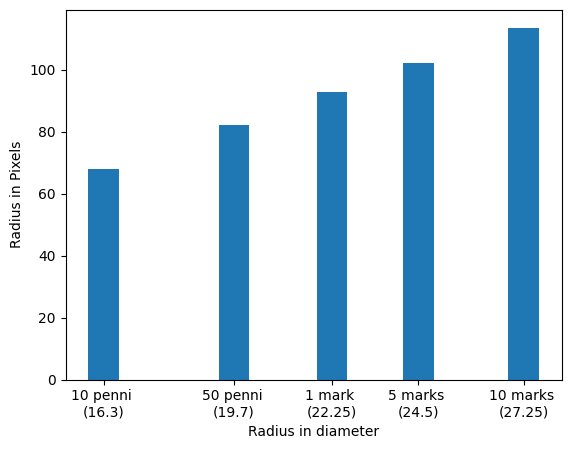

In [17]:
coin_diameters_mm = [27.25, 24.50, 22.25, 19.70, 16.30]  # Diameters from Table 1
names = ["10 marks", "5 marks", "1 mark", "50 penni", "10 penni"]
resolution_mm_per_pixel = 0.12
radii_pixels = [d / (2 * resolution_mm_per_pixel) for d in coin_diameters_mm]
x = coin_diameters_mm
plt.bar(x, height=radii_pixels)
plt.xticks(x, [f"{n} \n({d})" for n, d in zip(names, coin_diameters_mm)])
plt.ylabel("Radius in Pixels")
plt.xlabel("Radius in diameter")
plt.show()

## Step 3: Apply Canny edge detection

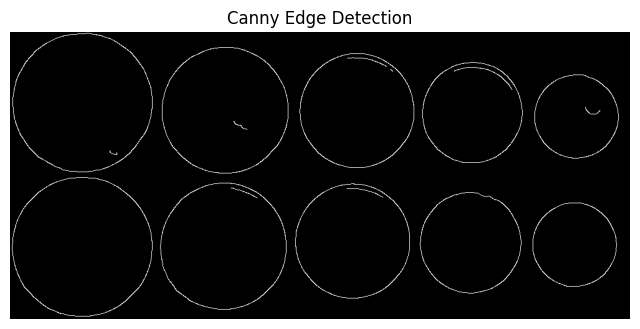

In [65]:
edges = feature.canny(gray_image, sigma=3)

# Visualize the edges
plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

## Step 4: Perform Hough transform

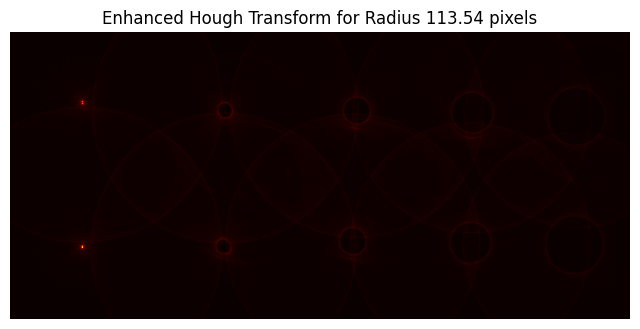

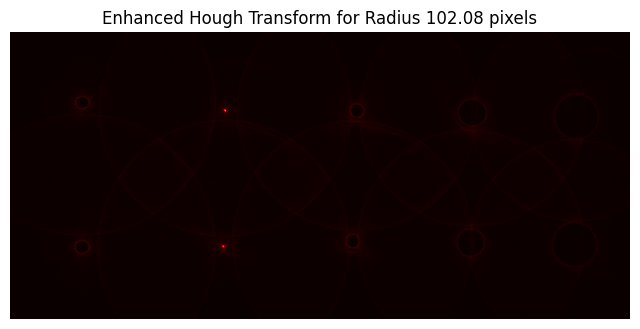

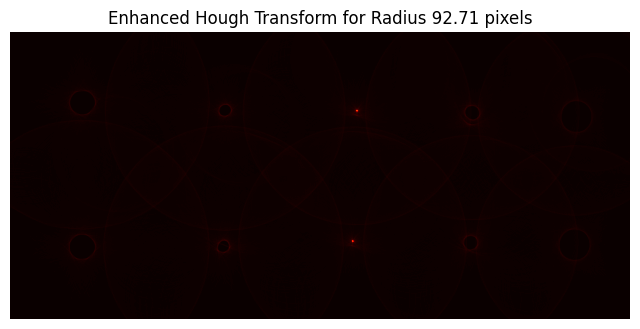

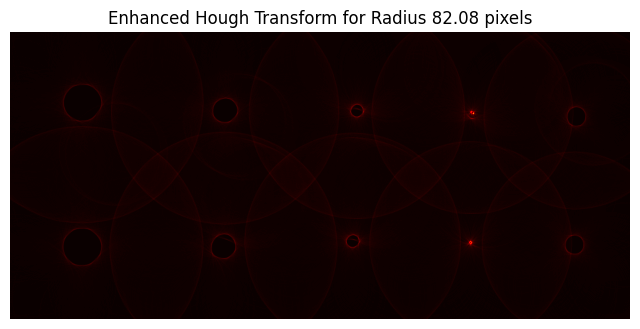

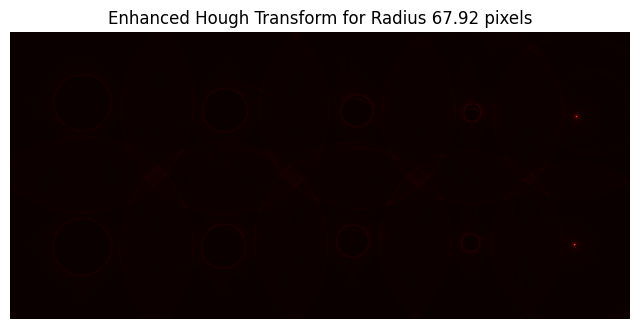

In [66]:
hough_results = transform.hough_circle(edges, radii_pixels)
# Highlight peaks in the Hough transform results
alpha = 2  # Controls sharpness of enhancement
for i, radius_matrix in enumerate(hough_results):
    # Normalize the matrix
    radius_matrix_norm = (radius_matrix - radius_matrix.min()) / (radius_matrix.max() - radius_matrix.min())
    # Apply exponential scaling
    radius_matrix_highlighted = np.exp(alpha * radius_matrix_norm)
    # Normalize again for visualization
    radius_matrix_highlighted = (radius_matrix_highlighted - radius_matrix_highlighted.min()) / \
                                (radius_matrix_highlighted.max() - radius_matrix_highlighted.min())

    # Visualize the highlighted Hough transform results
    plt.figure(figsize=(8, 8))
    plt.imshow(radius_matrix_highlighted, cmap='hot')
    plt.title(f'Enhanced Hough Transform for Radius {radii_pixels[i]:.2f} pixels')
    plt.axis('off')
    plt.show()


## Step 5: Extract peaks using Hough circle peaks

In [68]:
accums, cx, cy, radii = transform.hough_circle_peaks(
    hough_results, radii_pixels, total_num_peaks=10, normalize=True, min_xdistance=100, min_ydistance=100,
)
accums, cx, cy, radii

(array([0.8515625 , 0.80208333, 0.68939394, 0.64583333, 0.54965753,
        0.54794521, 0.38983051, 0.45216049, 0.31779661, 0.38271605]),
 array([910, 913, 552, 559, 343, 347, 747, 116, 744, 116]),
 array([343, 137, 337, 128, 345, 128, 132, 347, 339, 113]),
 array([ 67.91666667,  67.91666667,  92.70833333,  92.70833333,
        102.08333333, 102.08333333,  82.08333333, 113.54166667,
         82.08333333, 113.54166667]))

## Step 6: Superimpose detected circles on the original image

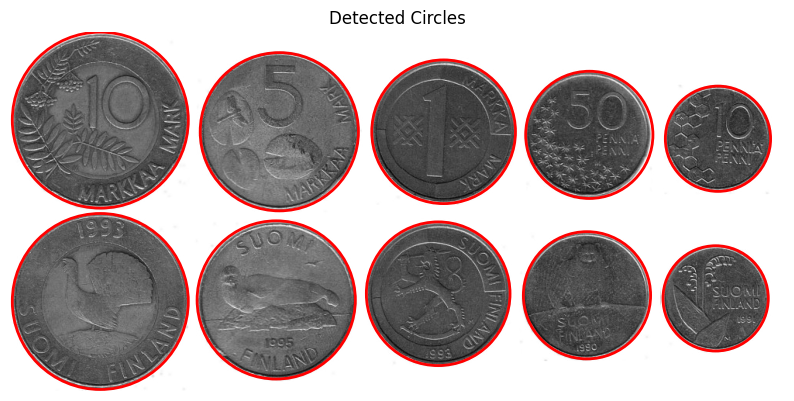

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gray_image, cmap='gray')

for center_y, center_x, radius in zip(cy, cx, radii):
    circle = Circle((center_x, center_y), radius, color='red', fill=False, linewidth=2)
    ax.add_patch(circle)

plt.title('Detected Circles')
plt.axis('off')
plt.show()
